## Loss Functions

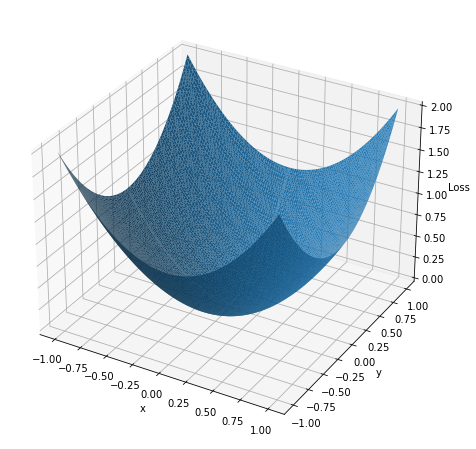

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z =  x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

# fig.savefig('chapter5_plot1.pdf')

plt.show()

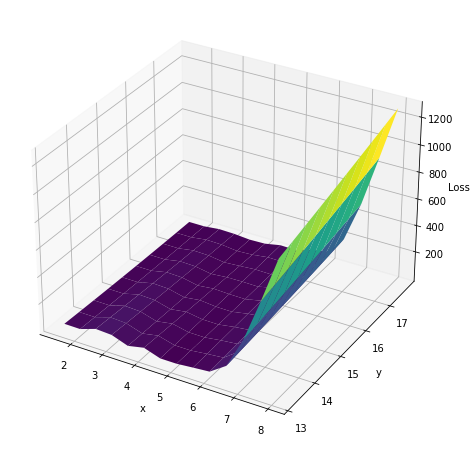

In [42]:
X = np.linspace(1.5, 8.5, num = 14)
Y = 16 + 4.2*X + np.random.normal(size = 14, loc = 0, scale = 2)

x = np.arange(1.5, 8.5, 0.5)
y = np.arange(13.2, 18, 0.5)
x, y = np.meshgrid(x, y)

# # Compute z to make the pringle surface.
z_pred = y + x*X
loss = np.power((z_pred - Y), 2)

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_surface(x, y, loss, label = "Loss surface", cmap = 'viridis', edgecolor = 'none')
ax.set_xlabel('x')  
ax.set_ylabel('y')
ax.set_zlabel('Loss')

fig.savefig('chapter5_plot2.pdf')

plt.show()

## Loss Function with Optimization Path